In [45]:
#import matplotlib,pandas and seaborn

import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

## Task 1: Import the EPL data

The English Premier League data is contained in a CSV file named `EPL.csv`.

The dataset contains the following columns.

- `Season`: Season year(s)
- `Pos`: final position that season
- `Team`: name of team 
- `Pld`: Number of matches played 
- `W`: Number of wins
- `D`: Number of draws
- `L`: Number of losses
- `GF`: Goals scored that season
- `GA`: Goals conceded that seasom
- `GD`: Difference in goals scored vs. conceded
- `Pts`: Total points at end of season
- `Qualification or Relegation`: result at end of season

In [46]:
epl = pd.read_csv(r"C:\Users\thika\Downloads\EPL.csv")
epl.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [47]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


In [48]:
# Filter out the columns 

epl_analysis = epl[['Season','Pos','Team','GF','GD','Pts','Qualification or relegation']]
epl_analysis

,Season,Pos,Team,GF,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,79,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,63,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,71,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,64,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,57,15,66,Qualification for the UEFA Cup first round[a]
...,...,...,...,...,...,...,...
435,2021-22,16,Everton,43,-23,39,Not Applicable
436,2021-22,17,Leeds United,42,-37,38,Not Applicable
437,2021-22,18,Burnley,34,-19,35,Relegation to the EFL Championship
438,2021-22,19,Watford,34,-43,23,Relegation to the EFL Championship


## Task 2: Clean up the Qualification column to make it less _wordy_

.In this section we are going to write a function to go through out newly created dataframe, editing the values in the 'Qualification or relegation' column.

.This will make the data easier to work with when it comes time to create charts/plots.

.This function will make some assumptions. Entries containing:

`Champions League` will be simplified to Champions League

`UEFA or Europa` will be simplified to Europa

`Relegation` will be simplified to Relegation
Anything else will be converted to - .

In [49]:
def update_result(result):
    if 'Champions League' in result:
        result = 'Champions League'
    elif 'Europa' in result or 'UEFA' in result:
        result = 'Europa'
    elif 'Relegation' in result:
        result = 'relegation'

    else:
        result = '-'

    return result

In [50]:
# Update column name from 'Qualification or relegation' to 'Result'

epl_analysis = epl_analysis.rename(columns={'Qualification or relegation':'Result'}) 

epl_analysis['Result'] = epl_analysis['Result'].apply(update_result)

print(epl_analysis['Result'].value_counts())

-                   220
Champions League     89
Europa               68
relegation           63
Name: Result, dtype: int64


## Task 3: Group by Champions league, and examine the data

We have a clean `Result` column that has categorical data that we can calculate on.

Now we will select data from the `epl_analysis` table and perform some comparisons from season to season for teams that qualify for each competition.

- Create a variable `cl_qualification`. Assign it to the Champions league qualifiers from the `epl_analysis` table.
- Create a `cl_qual_stats` variable. Using `cl_qualification`, group by season, then aggregate to get maximum position, minimum points, and minimum goal difference.
- Print the qualifier statistics.

In [51]:
cl_qualification = epl_analysis[epl_analysis["Result"]== "Champions League"]

cl_qual_stats = cl_qualification.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'})

print(cl_qual_stats)                         

         Pos  Pts  GD
Season               
2000-01    3   69  25
2001-02    4   71  22
2002-03    4   67  15
2003-04    4   60  18
2004-05    5   58  -1
2005-06    4   67  32
2006-07    4   68  28
2007-08    4   76  39
2008-09    4   72  31
2009-10    4   70  26
2010-11    4   68  27
2011-12    6   64  19
2012-13    4   73  32
2013-14    4   79  27
2014-15    4   70  25
2015-16    4   66  29
2016-17    6   69  25
2017-18    4   75  38
2018-19    4   71  24
2019-20    4   66  15
2020-21    4   67  22
2021-22    4   71  29


In [52]:
europa_qualification = epl_analysis[epl_analysis["Result"] == "Europa"]

europa_qualification_stats = europa_qualification.groupby('Season').agg({'Pos':'max','Pts':'min','GD':'min'}) 

print(europa_qualification_stats)
                                                                        

         Pos  Pts  GD
Season               
2000-01    6   61  15
2001-02   18   36 -23
2002-03    9   51  -7
2003-04   11   48  -8
2004-05    7   55   5
2005-06    9   55  -3
2006-07    7   56  -5
2007-08   11   46  -8
2008-09    7   53   5
2009-10    7   63  13
2010-11   18   39 -21
2011-12    8   52   5
2012-13   18   36 -26
2013-14   16   37 -15
2014-15   12   47  -3
2015-16    7   62  14
2016-17    7   61  18
2017-18    7   54  -3
2018-19    7   57   1
2019-20    8   56   8
2020-21    7   62  15
2021-22    7   56   0


- Most of the time 70+ Pts will qualify you for the Champions League, however not always.
- Usually, it takes around 55 Pts to qualify for the Europa league.
- GD isn't a great predictor of which competition a team will qualify for as there is such a wide range.

There is an obseravtion made which maybe outliers:

- Only 3 occasions has a team below 4th qualified for the Champions League.
- Only 1 time has a team qualified for the CL with under 60 Pts.
    - In that year, a team also qualified with a negative GD (only time a team has qualified with <10 GD).
- On 3 separate occasions a team has qualified for Europa league and been relegated in the same year.

## Task 5: Plot a Time Series of EPL winners and Relegated teams for 2000&ndash;2022

- Select the teams from the `epl_analysis` table where `'Pos' == 1` and store as `epl_winners`.
- Select the teams from the `epl_analysis` table where `'Pos' == 18` and store as `relegation_zone`.
- Reset the indexes for both.
- Set figure size to be 12 x 6.
- Use seaborn (`sns`) lineplot to Season vs Pts for winners and relegated teams.
- Display the plot.

TypeError: 'str' object is not callable

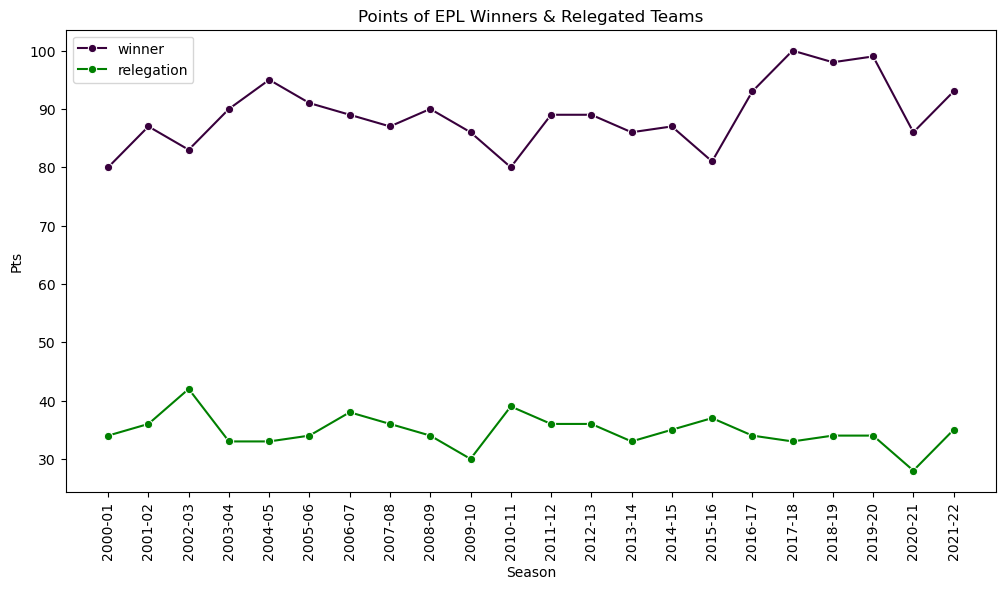

In [53]:
epl_winners = epl_analysis[epl_analysis["Pos"] == 1]
epl_winners = epl_winners.reset_index(drop = True)

relegation_zone = epl_analysis[epl_analysis["Pos"]==18]
relegation_zone = relegation_zone.reset_index(drop=True)

plt.figure(figsize=(12,6))

sns.lineplot(x = 'Season', y = 'Pts', data=epl_winners,
              marker='o', color='#38003c', label='winner')

sns.lineplot(x='Season', y='Pts', data=relegation_zone,
             marker='o',color='green', label='relegation')

plt.xticks(rotation = 90)

plt.title('Points of EPL Winners & Relegated Teams')
plt.xlabel('Season')
plt.ylabel('Points')

plt.show()


#Lets find a correlation between the teams that win the premier league,
  #and those that are relegated

print(epl_winners.Pts.sub(relegation_zone.Pts).mean())

print(epl_winners.Pts.corr(relegation_zone.Pts))

- Here we can see there is a weak negative correlation `-0.3` between the amount of Pts to win the premier league vs the amount of points teams need to avoid relegation.
    - A negative correlation means that when top teams do really well, the relegation threshold is usually lower

- We can see from the gap that the _best_ relegated team is pretty much always between 30 and 40 pts (usually around 35).
- We can also clearly see that no team has won the league with less than 80pts (since 2000-01).
- It looks as though the pts needed to win the league is slowly increasing, whereas the pts to avoid relegation are staying roughly the same. 

## Task 6: Create a Bar Chart Showing Premier League + European Years for Each Team

- Create a variable `team_counts` and store the number of times each team appears in our `epl_analysis` data.
- This is the number of years each team has been in the premier league.
- To find European qualifications, count the number of times the `'Result'` column in `epl_analysis` has contained `'Europa'` or `'Champions League'` for each team.
- To do this we first need to find the index for each time a team qualified for europe by using the `.isin()` on the `'Result'` column of our `epl_analysis` data. Store this in `euro_ids`
- Filter the `'Teams'` column of the `epl_analysis` data based on `euro_ids`, then return the `.value_counts()`. Store this as `euro_year_counts`

In [54]:
team_counts = epl_analysis['Team'].value_counts()

euro_ids = epl_analysis['Result'].isin(['Europa','Champions League'])

euro_year_counts = epl_analysis[euro_ids]['Team'].value_counts()

- Draw bar plots for `team_counts` and `euro_year_counts` to see how many seasons each team has been in the Premier League, and how many times each team has qualified for european competitions.

- For the `team_counts` plot:
    - Color the bars with `red`.
    - Set the y-axis label to `Years in EPL`
    - Rotate x-axis labels by 90 degrees.
    - Show the plot.
   
- Draw the same plot but with `euro_year_counts` on the y-axis to see how many times each team has qualified for european competitons.
    - This time color the bars with `black`.
    - Set the y-axis label to `Years in European Competition`.

TypeError: 'str' object is not callable

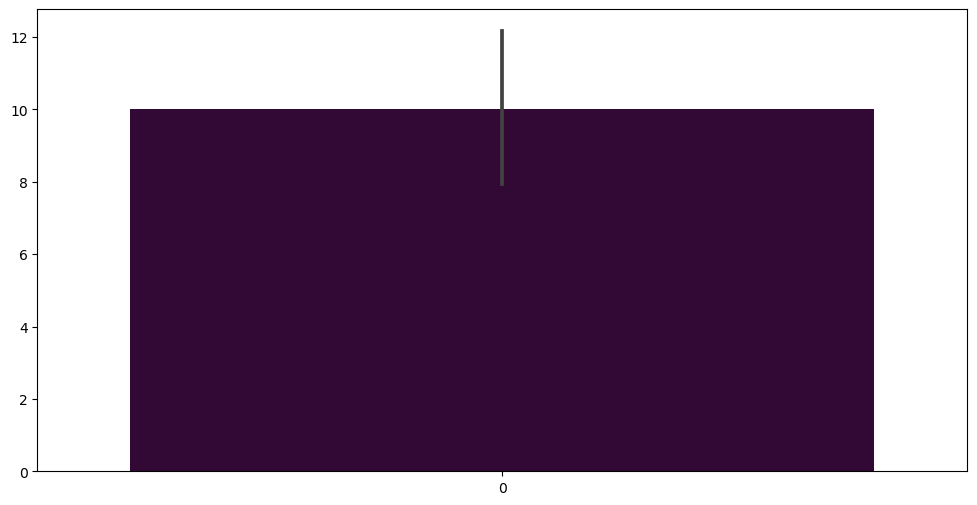

In [55]:
fig = plt.figure(figsize=(12, 6))
sns.barplot(data=team_counts, color='#38003c')
plt.ylabel('Years in EPL')
plt.xticks(rotation=90)
plt.show()